In [85]:
# load and summarize the dataset
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


In [125]:
df_train = pd.read_csv('Data Prepared for Modelling/Smote Data/df_train_imputed_median_smote.csv')
df_test = pd.read_csv('Data Prepared for Modelling/Smote Data/df_test_imputed_median_smote.csv')

In [127]:
df_train['Top-up Month'].head()

0    0
1    6
2    1
3    0
4    5
Name: Top-up Month, dtype: int64

# Creating data with Median Imputed data

NA values in Training Data:  0 
NA values in Testing Data : 0
Class=0, n=8366 (6.503%)
Class=6, n=106677 (82.917%)
Class=1, n=1034 (0.804%)
Class=5, n=3656 (2.842%)
Class=2, n=2368 (1.841%)
Class=3, n=3492 (2.714%)
Class=4, n=3062 (2.380%)


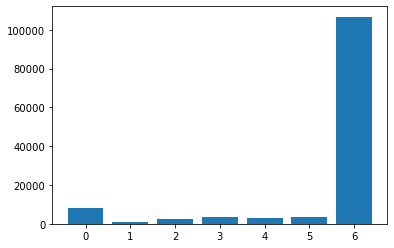

In [138]:
df_train = pd.read_csv('Data Prepared for Modelling/df_train_imputed_median.csv')
df_test = pd.read_csv('Data Prepared for Modelling/df_test_imputed_median.csv')
df_train = df_train.rename(columns={'Top.up.Month': 'Top-up Month'})
# split into input and output elements
X, y = df_train.drop(['ID','Top-up Month'], axis =1), df_train['Top-up Month']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
print('NA values in Training Data: ', df_train.isna().sum().sum(),'\nNA values in Testing Data :', df_test.isna().sum().sum())
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [155]:
print(counter,'\n', df_train['Top-up Month'].value_counts())
dictionary = {6 :'No Top-up Service', 0:'> 48 Months',5 :'36-48 Months', 3:'24-30 Months',
              4 :'30-36 Months', 2 :'18-24 Months', 1:'12-18 Months'}
z= pd.DataFrame(y)
z = z.rename(columns={0:'Top-up Month'})
z['Top-up Month']=z['Top-up Month'].map(dictionary)
z['Top-up Month'].value_counts()
# No Top-up Service   6
# > 48 Months         0
#36-48 Months         5  
#24-30 Months         3  
#30-36 Months         4  
#18-24 Months         2  
#12-18 Months         1  

Counter({6: 106677, 0: 8366, 5: 3656, 3: 3492, 4: 3062, 2: 2368, 1: 1034}) 
 No Top-up Service    106677
 > 48 Months           8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64


No Top-up Service    106677
> 48 Months            8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64

Class=0, n=106677 (14.286%)
Class=6, n=106677 (14.286%)
Class=1, n=106677 (14.286%)
Class=5, n=106677 (14.286%)
Class=2, n=106677 (14.286%)
Class=3, n=106677 (14.286%)
Class=4, n=106677 (14.286%)


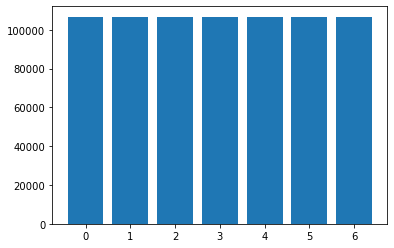

In [130]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [133]:
#y = LabelEncoder().inverse_transform(y)
y = pd.DataFrame(y).apply(LabelEncoder.fit_transform)
df_train1 = pd.concat((pd.DataFrame(X), pd.DataFrame(y)), axis =1)
train_cols = df_train1.columns
test_cols = df_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

train_not_test

TypeError: fit_transform() missing 1 required positional argument: 'y'

In [89]:
df_train1 = df_train1[common_cols]
if 'Top-up Month' not in df_train1:
    df_train1['Top-up Month'] = pd.DataFrame(y)
df_test1 = df_test[common_cols]

print('Training Shape:', df_train1.shape,'\nTest Data Shape:', df_test1.shape)

Training Shape: (746739, 111) 
Test Data Shape: (14745, 110)


In [90]:
df_train1.to_csv('df_train_imputed_median_smote.csv')
df_test1.to_csv('df_test_imputed_median_smote.csv')

# Creating a Dataframe with High Mutual Information

NA values in Training Data:  0 
NA values in Testing Data : 0
Class=0, n=8366 (6.503%)
Class=6, n=106677 (82.917%)
Class=1, n=1034 (0.804%)
Class=5, n=3656 (2.842%)
Class=2, n=2368 (1.841%)
Class=3, n=3492 (2.714%)
Class=4, n=3062 (2.380%)


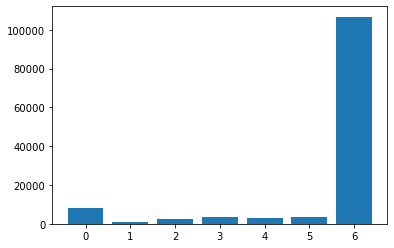

In [91]:
df_train = pd.read_csv('df_train1_mutualInformation.csv')
df_test = pd.read_csv('df_test1_mutualInformation.csv')
# split into input and output elements
X, y = df_train.drop(['Top-up Month'], axis =1), df_train['Top-up Month']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
print('NA values in Training Data: ', df_train.isna().sum().sum(),'\nNA values in Testing Data :', df_test.isna().sum().sum())
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=106677 (14.286%)
Class=6, n=106677 (14.286%)
Class=1, n=106677 (14.286%)
Class=5, n=106677 (14.286%)
Class=2, n=106677 (14.286%)
Class=3, n=106677 (14.286%)
Class=4, n=106677 (14.286%)


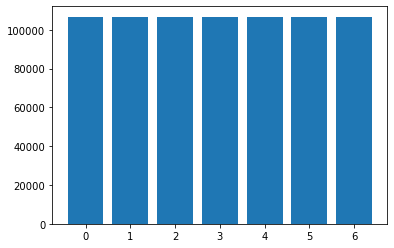

In [92]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [93]:
df_train1 = pd.concat((pd.DataFrame(X), pd.DataFrame(y)), axis =1)
train_cols = df_train1.columns
test_cols = df_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

train_not_test

Index([                                                                     0,
                                                   'ACCOUNT-STATUS_Cancelled',
       'ACCT-TYPE_Business Non-Funded Credit Facility-Priority Sector-Others',
                                                        'ACCT-TYPE_JLG Group',
                                              'ACCT-TYPE_Loan on Credit Card',
                                                   'ACCT-TYPE_Telco Landline',
                                                      'Frequency_Half Yearly'],
      dtype='object')

In [95]:
df_train1 = df_train1[common_cols]
if 'Top-up Month' not in df_train1:
    df_train1['Top-up Month'] = pd.DataFrame(y)

df_test1 = df_test[common_cols]

In [96]:
print('Training Shape:', df_train1.shape,'\nTest Data Shape:', df_test1.shape)

Training Shape: (746739, 93) 
Test Data Shape: (14745, 92)


In [97]:
df_train1.to_csv('df_train1_mutualInformation_smote.csv')
df_test1.to_csv('df_test1_mutualInformation_smote.csv')

# Creating dataframe with Correlated columns removed

NA values in Training Data:  0 
NA values in Testing Data : 0
Class=0, n=8366 (6.503%)
Class=6, n=106677 (82.917%)
Class=1, n=1034 (0.804%)
Class=5, n=3656 (2.842%)
Class=2, n=2368 (1.841%)
Class=3, n=3492 (2.714%)
Class=4, n=3062 (2.380%)


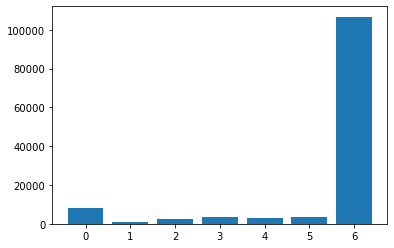

In [98]:
df_train = pd.read_csv('df_train2_corr_removed.csv')
df_test = pd.read_csv('df_test2_corr_removed.csv')
# split into input and output elements
X, y = df_train.drop(['Top-up Month'], axis =1), df_train['Top-up Month']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
print('NA values in Training Data: ', df_train.isna().sum().sum(),'\nNA values in Testing Data :', df_test.isna().sum().sum())
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=106677 (14.286%)
Class=6, n=106677 (14.286%)
Class=1, n=106677 (14.286%)
Class=5, n=106677 (14.286%)
Class=2, n=106677 (14.286%)
Class=3, n=106677 (14.286%)
Class=4, n=106677 (14.286%)


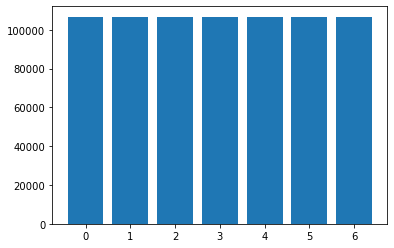

In [99]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [100]:
df_train1 = pd.concat((pd.DataFrame(X), pd.DataFrame(y)), axis =1)
train_cols = df_train1.columns
test_cols = df_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

train_not_test

Index([                                                                     0,
                                                   'ACCOUNT-STATUS_Cancelled',
                                              'ACCOUNT-STATUS_Sold/Purchased',
       'ACCT-TYPE_Business Non-Funded Credit Facility-Priority Sector-Others',
                                                        'ACCT-TYPE_JLG Group',
                                                          'ACCT-TYPE_Leasing',
                                              'ACCT-TYPE_Loan on Credit Card',
                                                        'ACCT-TYPE_SHG Group',
                                                   'ACCT-TYPE_Telco Landline',
                                                       'CONTRIBUTOR-TYPE_CCC',
                                                      'Frequency_Half Yearly'],
      dtype='object')

In [101]:
df_train1 = df_train1[common_cols]
if 'Top-up Month' not in df_train1:
    df_train1['Top-up Month'] = pd.DataFrame(y)
df_test1 = df_test[common_cols]

In [102]:
print('Training Shape:', df_train1.shape,'\nTest Data Shape:', df_test1.shape)

Training Shape: (746739, 104) 
Test Data Shape: (14745, 103)


In [103]:
df_train1.to_csv('df_train2_corr_removed_smote.csv')
df_test1.to_csv('df_test2_corr_removed_smote.csv')

# Creating dataset for corr removed columns data

NA values in Training Data:  0 
NA values in Testing Data : 0
Class=0, n=8366 (6.503%)
Class=6, n=106677 (82.917%)
Class=1, n=1034 (0.804%)
Class=5, n=3656 (2.842%)
Class=2, n=2368 (1.841%)
Class=3, n=3492 (2.714%)
Class=4, n=3062 (2.380%)


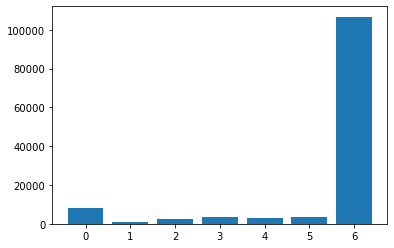

In [115]:
df_train = pd.read_csv('df_train1_corr_removed.csv')
df_test = pd.read_csv('df_test1_corr_removed.csv')
# split into input and output elements
X, y = df_train.drop(['Top-up Month'], axis =1), df_train['Top-up Month']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
print('NA values in Training Data: ', df_train.isna().sum().sum(),'\nNA values in Testing Data :', df_test.isna().sum().sum())
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=106677 (14.286%)
Class=6, n=106677 (14.286%)
Class=1, n=106677 (14.286%)
Class=5, n=106677 (14.286%)
Class=2, n=106677 (14.286%)
Class=3, n=106677 (14.286%)
Class=4, n=106677 (14.286%)


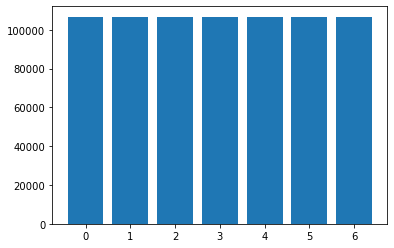

In [116]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [117]:
df_train1 = pd.concat((pd.DataFrame(X), pd.DataFrame(y)), axis =1)
train_cols = df_train1.columns
test_cols = df_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

train_not_test

Index([                                                                     0,
                                                   'ACCOUNT-STATUS_Cancelled',
                                              'ACCOUNT-STATUS_Sold/Purchased',
       'ACCT-TYPE_Business Non-Funded Credit Facility-Priority Sector-Others',
                                                        'ACCT-TYPE_JLG Group',
                                                          'ACCT-TYPE_Leasing',
                                              'ACCT-TYPE_Loan on Credit Card',
                                                        'ACCT-TYPE_SHG Group',
                                                   'ACCT-TYPE_Telco Landline',
                                                       'CONTRIBUTOR-TYPE_CCC',
                                                      'Frequency_Half Yearly'],
      dtype='object')

In [118]:
df_train1 = df_train1[common_cols]
if 'Top-up Month' not in df_train1:
    df_train1['Top-up Month'] = pd.DataFrame(y)
df_test1 = df_test[common_cols]
print('Training Shape:', df_train1.shape,'\nTest Data Shape:', df_test1.shape)

Training Shape: (746739, 101) 
Test Data Shape: (14745, 100)


In [119]:
df_train1.to_csv('df_train1_corr_removed_smote.csv')
df_test1.to_csv('df_test1_corr_removed_smote.csv')

# Creating a dataframe with 92 PCA components

NA values in Training Data:  0 
NA values in Testing Data : 0
Class=0, n=8366 (6.503%)
Class=6, n=106677 (82.917%)
Class=1, n=1034 (0.804%)
Class=5, n=3656 (2.842%)
Class=2, n=2368 (1.841%)
Class=3, n=3492 (2.714%)
Class=4, n=3062 (2.380%)


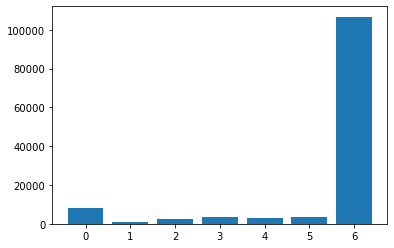

In [109]:
df = pd.read_csv('df_train_Data1.csv')
df_train = pd.read_csv('df_train_PCA_92component.csv')
df_test = pd.read_csv('df_test_PCA_92component.csv')
df_train = pd.concat((df_train, df['Top-up Month']), axis=1)
# split into input and output elements
X, y = df_train.drop(['Top-up Month'], axis =1), df_train['Top-up Month']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
print('NA values in Training Data: ', df_train.isna().sum().sum(),'\nNA values in Testing Data :', df_test.isna().sum().sum())
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=106677 (14.286%)
Class=6, n=106677 (14.286%)
Class=1, n=106677 (14.286%)
Class=5, n=106677 (14.286%)
Class=2, n=106677 (14.286%)
Class=3, n=106677 (14.286%)
Class=4, n=106677 (14.286%)


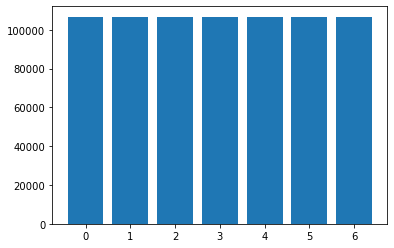

In [110]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [111]:
df_train1 = pd.concat((pd.DataFrame(X), pd.DataFrame(y)), axis =1)
train_cols = df_train1.columns
test_cols = df_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

common_cols

Index(['PC#1', 'PC#2', 'PC#3', 'PC#4', 'PC#5', 'PC#6', 'PC#7', 'PC#8', 'PC#9',
       'PC#10', 'PC#11', 'PC#12', 'PC#13', 'PC#14', 'PC#15', 'PC#16', 'PC#17',
       'PC#18', 'PC#19', 'PC#20', 'PC#21', 'PC#22', 'PC#23', 'PC#24', 'PC#25',
       'PC#26', 'PC#27', 'PC#28', 'PC#29', 'PC#30', 'PC#31', 'PC#32', 'PC#33',
       'PC#34', 'PC#35', 'PC#36', 'PC#37', 'PC#38', 'PC#39', 'PC#40', 'PC#41',
       'PC#42', 'PC#43', 'PC#44', 'PC#45', 'PC#46', 'PC#47', 'PC#48', 'PC#49',
       'PC#50', 'PC#51', 'PC#52', 'PC#53', 'PC#54', 'PC#55', 'PC#56', 'PC#57',
       'PC#58', 'PC#59', 'PC#60', 'PC#61', 'PC#62', 'PC#63', 'PC#64', 'PC#65',
       'PC#66', 'PC#67', 'PC#68', 'PC#69', 'PC#70', 'PC#71', 'PC#72', 'PC#73',
       'PC#74', 'PC#75', 'PC#76', 'PC#77', 'PC#78', 'PC#79', 'PC#80', 'PC#81',
       'PC#82', 'PC#83', 'PC#84', 'PC#85', 'PC#86', 'PC#87', 'PC#88', 'PC#89',
       'PC#90', 'PC#91', 'PC#92'],
      dtype='object')

In [112]:
df_train1 = df_train1[common_cols]

if 'Top-up Month' not in df_train1:
    df_train1['Top-up Month'] = pd.DataFrame(y)


df_test1 = df_test[common_cols]
print('Training Shape:', df_train1.shape,'\nTest Data Shape:', df_test1.shape)

Training Shape: (746739, 93) 
Test Data Shape: (14745, 92)


In [114]:
df_train1.to_csv('df_train_PCA_92component_smote.csv')
df_test1.to_csv('df_test_PCA_92component_removed_smote.csv')